# Regressió Logística - Exemple Compra mitjançant Social Network
------

In [1]:
#Importació de llibrerires
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv('../dataset/Social_Network_Ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


In [3]:
#Traiem la variable User ID
data = data.drop(['User ID'], axis=1)
data.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19.0,19000.0,0
1,Male,35.0,20000.0,0
2,Female,26.0,43000.0,0
3,Female,27.0,57000.0,0
4,Male,19.0,76000.0,0


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,400.0,37.6550,10.482877,18.0,29.75,37.0,46.0,60.0
EstimatedSalary,400.0,69742.5000,34096.960282,15000.0,43000.00,70000.0,88000.0,150000.0
Purchased,400.0,0.3575,0.479864,0.0,0.00,0.0,1.0,1.0


In [6]:
# Tranformem la variable categòrica Gender

varlist =  ['Gender']

# Definició de la funció de map/tranformació
def binary_map(x):
    return x.map({'Male': 1, "Female": 0})

# Apliquem la funció de map
data[varlist] = data[varlist].apply(binary_map)

data.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19.0,19000.0,0
1,1,35.0,20000.0,0
2,0,26.0,43000.0,0
3,0,27.0,57000.0,0
4,1,19.0,76000.0,0


In [7]:
# Com que veiem que tenim molta diferència d'escala entre les variables independents. 
# Els salari dominaria moltíssim sobre la variable edat
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

scaled_vars = ['Age','EstimatedSalary']

data[scaled_vars] = scalar.fit_transform(data[scaled_vars])
data.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,-1.781797,-1.490046,0
1,1,-0.253587,-1.460681,0
2,0,-1.113206,-0.785290,0
3,0,-1.017692,-0.374182,0
4,1,-1.781797,0.183751,0


In [8]:
x_values = data[['Gender','Age','EstimatedSalary']].values
y_values = data['Purchased'].values

Tenim 400 registres. Podríem tenir 100 observacions per el test i 300 per l'entrenament.


In [9]:
from sklearn.model_selection import train_test_split

# Especifiquem una llavor per tal de que la separació de dades sempre tingui el mateix resultat.
np.random.seed(0)

# Fem una separació de 80 i 20
data_train, data_test = train_test_split(data, test_size = 0.25, random_state = 0)

#Separem les variables independents de la depenent
y_train = data_train.pop('Purchased')
x_train = data_train

y_test = data_test.pop('Purchased')
x_test = data_test

## Construïm el model

In [10]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)


LogisticRegression(random_state=0)

In [11]:
y_pred  = classifier.predict(x_test)

## Elaborem la matriu de confusió

In [12]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)

In [13]:
conf_matrix

array([[65,  3],
       [ 7, 25]], dtype=int64)

|           | compra (test) | no compra (test) |
|-----------|------------|---------------|
| compra(pred)    | 65         | 3             |
| no compra(pred) | 7          | 25            |


Veiem que tenim la matriu de confusió a on tenim 65 i 25 prediccions correctes (total 90):
* 65 casos l'algorisme prediu que compra i realment compra.
* 25 casos l'algorisme prediu que no compra i realment no compra.
En canvi 10 ocasions s'equivoca:
* 3 casos diu que compra quan realment no compra 
* 7 casos diu que no compra quan realment compra

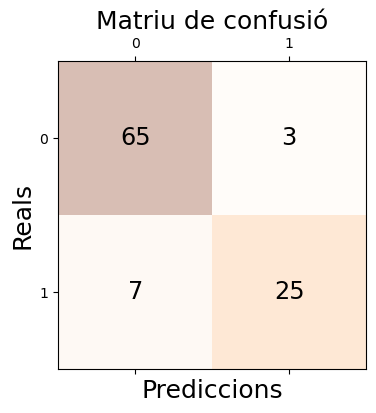

In [19]:
# Codi per mostrar la matriu de confusió amb Matplotlib
#
fig, ax = plt.subplots(figsize=(4, 4))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Prediccions', fontsize=18)
plt.ylabel('Reals', fontsize=18)
plt.title('Matriu de confusió', fontsize=18)
plt.show()